In [1]:
import pandas as pd 
import numpy as np 
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns

# Importing data /quick exploration

In [2]:
data = pd.read_csv('movies_last.csv')

In [3]:
data.head(2)

,Unnamed: 0,Unnamed: 0.1,all_titles,all_years,all_scores,all_meta,all_votes,all_gross,all_genres,id
0,0,0,Star Wars: Episode VII - The Force Awakens,(2015),7.9,81,799424,"936,662,225","\nAction, Adventure, Sci-Fi",tt2488496
1,1,1,Avengers: Endgame,(2019),8.5,78,598830,"858,373,000","\nAction, Adventure, Drama",tt4154796


In [4]:
data.drop(['Unnamed: 0', 'Unnamed: 0.1'], axis=1, inplace = True)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5050 entries, 0 to 5049
Data columns (total 8 columns):
all_titles    5050 non-null object
all_years     5050 non-null object
all_scores    5050 non-null object
all_meta      5050 non-null object
all_votes     5050 non-null object
all_gross     5050 non-null object
all_genres    5050 non-null object
id            5050 non-null object
dtypes: object(8)
memory usage: 315.7+ KB


In [6]:
data.shape

(5050, 8)

# Clean data 

In [7]:
import re

In [8]:
def get_decade(x):
    if x == 5:
        return '50s'
    elif x == 6:
        return '60s'
    elif x == 7:
        return '70s'
    elif x == 8:
        return '80s'
    elif x == 9:
        return '90s'
    elif x == 0:
        return '00s'
    elif x == 1:
        return '10s'
    
    

In [ ]:
# def inflation_adjust()

In [9]:
data['all_years'] = data['all_years'].apply(lambda x: re.sub('[^0-9]','', x))

data['all_genres'] = data['all_genres'].apply(lambda x: x[1:])

data['all_gross'] = data['all_gross'].apply(lambda x: x.replace(',',''))
data['all_gross'] = data['all_gross'].apply(lambda x:  int(x) if x != 'no' else 0)

data['all_scores'] = data['all_scores'].apply(lambda x: x.replace('.',''))
data['all_scores'] = data['all_scores'].apply(lambda x: int(x) if x != 'NO' else 0)

data['all_meta'] = data['all_meta'].apply(lambda x: int(x.replace('.','')) if x != 'no' else 0)


data['all_years'] = data['all_years'].apply(lambda x: int(x))

data['dec'] = data['all_years'].apply(lambda x: int(str(x)[2]))
data['decade'] = data['dec'].apply(lambda x: get_decade(x) )








In [10]:
del data['dec']

In [11]:
data.head(2)

,all_titles,all_years,all_scores,all_meta,all_votes,all_gross,all_genres,id,decade
0,Star Wars: Episode VII - The Force Awakens,2015,79,81,799424,936662225,"Action, Adventure, Sci-Fi",tt2488496,10s
1,Avengers: Endgame,2019,85,78,598830,858373000,"Action, Adventure, Drama",tt4154796,10s


# Importing external csv to get the budget 

In [12]:
movies_metadata = pd.read_csv('movies_metadata.csv')

/Users/carloscutillas/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3057: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [13]:
budget_and_id = movies_metadata[['budget', 'imdb_id']]

#  Importing external csv to get CPI inflation index 

In [14]:
inflation = pd.read_csv('https://pkgstore.datahub.io/core/cpi-us/cpiai_csv/data/b17bfacbda3c08e51cd13fe544b8fca4/cpiai_csv.csv')

In [15]:
inflation.head(2)

,Date,Index,Inflation
0,1913-01-01,9.8,NaN
1,1913-02-01,9.8,0.0


In [16]:
inflation.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1213 entries, 0 to 1212
Data columns (total 3 columns):
Date         1213 non-null object
Index        1213 non-null float64
Inflation    1212 non-null float64
dtypes: float64(2), object(1)
memory usage: 28.5+ KB


In [17]:
inflation['Date'] = inflation['Date'].apply(lambda x: x[:4]) 

inflation['Date'] = inflation['Date'].astype(int)

In [18]:
inflation.head(2)

,Date,Index,Inflation
0,1913,9.8,NaN
1,1913,9.8,0.0


In [19]:
inf = inflation.groupby('Date').mean().reset_index(level= 0)

# Creating new dataframe

In [20]:
all_data = pd.merge(data, budget_and_id,how='left', left_on='id', right_on='imdb_id')

In [21]:
# all_data.head(5)

In [22]:
all_data.dropna(inplace=True)

In [23]:
all_data['budget'] = all_data['budget'].astype(int)

In [24]:
all_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4714 entries, 0 to 5053
Data columns (total 11 columns):
all_titles    4714 non-null object
all_years     4714 non-null int64
all_scores    4714 non-null int64
all_meta      4714 non-null int64
all_votes     4714 non-null object
all_gross     4714 non-null int64
all_genres    4714 non-null object
id            4714 non-null object
decade        4714 non-null object
budget        4714 non-null int64
imdb_id       4714 non-null object
dtypes: int64(5), object(6)
memory usage: 441.9+ KB


In [25]:
# sns.distplot(all_data.all_years)

In [26]:
all_data['genre_bis'] = all_data['all_genres'].apply(lambda x: 'Action' if 'Action' in x
                                                     else ('Romance' if 'Romance' in x else 'no') 
                                                    )

In [27]:
# all_data.genre_bis.value_counts()

In [28]:
all_data.shape

(4714, 12)

In [29]:
all_data.head(2)

,all_titles,all_years,all_scores,all_meta,all_votes,all_gross,all_genres,id,decade,budget,imdb_id,genre_bis
0,Star Wars: Episode VII - The Force Awakens,2015,79,81,799424,936662225,"Action, Adventure, Sci-Fi",tt2488496,10s,245000000,tt2488496,Action
2,Avatar,2009,78,83,1065708,760507625,"Action, Adventure, Fantasy",tt0499549,00s,237000000,tt0499549,Action


In [30]:
all_data['profit'] = all_data['all_gross'] - all_data['budget']

In [31]:
all_data.describe().T

,count,mean,std,min,25%,50%,75%,max
all_years,4714.0,1.997816e+03,1.347506e+01,1915.0,1990.00,2000.0,2008.00,2019.0
all_scores,4714.0,6.405388e+01,9.691270e+00,19.0,58.00,64.0,71.00,93.0
all_meta,4714.0,4.585342e+01,2.553559e+01,0.0,32.00,49.0,64.00,100.0
all_gross,4714.0,5.506381e+07,6.546027e+07,9074550.0,17540190.75,32864742.5,64469889.00,936662225.0
budget,4714.0,3.268043e+07,4.281290e+07,0.0,233750.00,19000000.0,45000000.00,380000000.0
profit,4714.0,2.238338e+07,5.090702e+07,-186921900.0,435454.00,15101924.0,33580143.25,691662225.0


#  Merging the inflation

In [32]:
all_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4714 entries, 0 to 5053
Data columns (total 13 columns):
all_titles    4714 non-null object
all_years     4714 non-null int64
all_scores    4714 non-null int64
all_meta      4714 non-null int64
all_votes     4714 non-null object
all_gross     4714 non-null int64
all_genres    4714 non-null object
id            4714 non-null object
decade        4714 non-null object
budget        4714 non-null int64
imdb_id       4714 non-null object
genre_bis     4714 non-null object
profit        4714 non-null int64
dtypes: int64(6), object(7)
memory usage: 515.6+ KB


In [33]:
inf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102 entries, 0 to 101
Data columns (total 3 columns):
Date         102 non-null int64
Index        102 non-null float64
Inflation    102 non-null float64
dtypes: float64(2), int64(1)
memory usage: 2.5 KB


In [34]:
data_with_inflation = pd.merge(all_data, inf,how='left', left_on='all_years', right_on='Date')

# Clean data with inflation 

In [35]:
del data_with_inflation['Inflation']

In [36]:
data_with_inflation.head()

,all_titles,all_years,all_scores,all_meta,all_votes,all_gross,all_genres,id,decade,budget,imdb_id,genre_bis,profit,Date,Index
0,Star Wars: Episode VII - The Force Awakens,2015,79,81,799424,936662225,"Action, Adventure, Sci-Fi",tt2488496,10s,245000000,tt2488496,Action,691662225,NaN,NaN
1,Avatar,2009,78,83,1065708,760507625,"Action, Adventure, Fantasy",tt0499549,00s,237000000,tt0499549,Action,523507625,2009.0,214.537000
2,Titanic,1997,78,75,979853,659325379,"Drama, Romance",tt0120338,90s,200000000,tt0120338,Romance,459325379,1997.0,160.516667
3,Jurassic World,2015,70,59,549843,652270625,"Action, Adventure, Sci-Fi",tt0369610,10s,150000000,tt0369610,Action,502270625,NaN,NaN
4,Avengers Assemble,2012,80,69,1206183,623279547,"Action, Adventure, Sci-Fi",tt0848228,10s,220000000,tt0848228,Action,403279547,2012.0,229.593917


In [37]:
def get_last_years_inflation(x):
    if x == int(2015):
        return 237
    elif x == 2016:
        return 240
    elif x == 2017:
        return 245
    elif x == 2018:
        return 251
    elif x == 2019:
        return 256
#     else:
#         return x
    

In [38]:
data_with_inflation['Index_all'] = data_with_inflation['all_years'].apply(lambda x: get_last_years_inflation(x) )
data_with_inflation['Index_all'] = data_with_inflation['Index_all'].astype(str)

data_with_inflation['Index'] = data_with_inflation['Index'].astype(str)


In [39]:
data_with_inflation['Index_all_years'] = data_with_inflation.Index.fillna('') + data_with_inflation.Index_all.fillna('')

# data_with_inflation['Index_all_years'] = data_with_inflation['Index_all'].combine_first(data_with_inflation['Index'])

data_with_inflation['Index_all_years'] = data_with_inflation['Index_all_years'].apply(
    lambda x: x.lstrip('nan').rstrip('nan'))


In [40]:
# data_with_inflation['Index_all_years']

In [41]:
del data_with_inflation['Index_all']
del data_with_inflation['Index']
del data_with_inflation['Date']


In [42]:
data_with_inflation.head(2)

,all_titles,all_years,all_scores,all_meta,all_votes,all_gross,all_genres,id,decade,budget,imdb_id,genre_bis,profit,Index_all_years
0,Star Wars: Episode VII - The Force Awakens,2015,79,81,799424,936662225,"Action, Adventure, Sci-Fi",tt2488496,10s,245000000,tt2488496,Action,691662225,237.0
1,Avatar,2009,78,83,1065708,760507625,"Action, Adventure, Fantasy",tt0499549,00s,237000000,tt0499549,Action,523507625,214.537


## Adjusting budget and gross to inflation

In [43]:
#  Re converting stringg to integer on index 

data_with_inflation['Index_all_years'] = data_with_inflation['Index_all_years'].astype(float)

In [44]:
data_with_inflation['budget_adjusted'] = (data_with_inflation['budget'] / data_with_inflation['Index_all_years'])*100

data_with_inflation['gross_adjusted'] = (data_with_inflation['all_gross'] / data_with_inflation['Index_all_years'])*100



In [45]:
data_with_inflation['profit_adjusted'] =  data_with_inflation['gross_adjusted'] - data_with_inflation['budget_adjusted'] 

In [ ]:
data_with_inflation.describe()

In [ ]:
# data_for_budget = all_data[all_data['budget'] > 0]

In [ ]:
# data_for_budget.to_csv('movies_for_budget', encoding='utf-8')
# all_data.to_csv('movies_all', encoding='utf-8')


In [ ]:
# data_with_inflation.to_csv('data_adjusted_to_inflation.csv')

# Visualisation to copy paste 

In [47]:
to_vis = data_with_inflation.replace(0,data_with_inflation.median())
to_vis

,all_titles,all_years,all_scores,all_meta,all_votes,all_gross,all_genres,id,decade,budget,imdb_id,genre_bis,profit,Index_all_years,budget_adjusted,gross_adjusted,profit_adjusted
0,Star Wars: Episode VII - The Force Awakens,2015,79,81,799424,936662225,"Action, Adventure, Sci-Fi",tt2488496,10s,245000000,tt2488496,Action,691662225,237.000000,1.033755e+08,3.952161e+08,2.918406e+08
1,Avatar,2009,78,83,1065708,760507625,"Action, Adventure, Fantasy",tt0499549,00s,237000000,tt0499549,Action,523507625,214.537000,1.104705e+08,3.544879e+08,2.440174e+08
2,Titanic,1997,78,75,979853,659325379,"Drama, Romance",tt0120338,90s,200000000,tt0120338,Romance,459325379,160.516667,1.245977e+08,4.107520e+08,2.861543e+08
3,Jurassic World,2015,70,59,549843,652270625,"Action, Adventure, Sci-Fi",tt0369610,10s,150000000,tt0369610,Action,502270625,237.000000,6.329114e+07,2.752197e+08,2.119285e+08
4,Avengers Assemble,2012,80,69,1206183,623279547,"Action, Adventure, Sci-Fi",tt0848228,10s,220000000,tt0848228,Action,403279547,229.593917,9.582135e+07,2.714704e+08,1.756491e+08
5,The Dark Knight,2008,90,84,2132130,534858444,"Action, Crime, Drama",tt0468569,00s,185000000,tt0468569,Action,349858444,215.302500,8.592562e+07,2.484218e+08,1.624962e+08
6,Rogue One,2016,78,65,493737,532177324,"Action, Adventure, Sci-Fi",tt3748528,10s,200000000,tt3748528,Action,332177324,240.000000,8.333333e+07,2.217406e+08,1.384072e+08
7,Beauty and the Beast,2017,72,65,247977,504014165,"Family, Fantasy, Musical",tt2771200,10s,160000000,tt2771200,no,344014165,245.000000,6.530612e+07,2.057201e+08,1.404139e+08
8,Finding Dory,2016,73,77,220167,486295561,"Animation, Adventure, Comedy",tt2277860,10s,200000000,tt2277860,no,286295561,240.000000,8.333333e+07,2.026232e+08,1.192898e+08
9,Star Wars: Episode I - The Phantom Menace,1999,65,51,668358,474544677,"Action, Adventure, Fantasy",tt0120915,90s,115000000,tt0120915,Action,359544677,166.575000,6.903797e+07,2.848835e+08,2.158455e+08


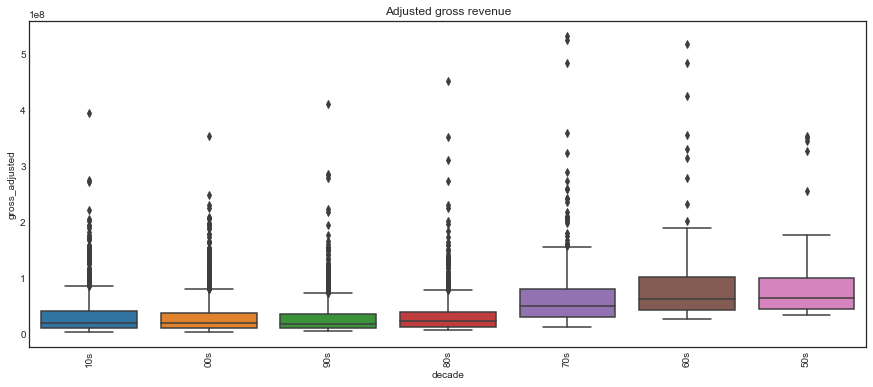

In [48]:
plt.style.use('seaborn-white')
fig = plt.figure(figsize=(15,6))

g = sns.boxplot(x=data_with_inflation['decade'], y=data_with_inflation['gross_adjusted'])
# g.set_yscale("log")

plt.title('Adjusted gross revenue')

plt.xticks(rotation=90)

plt.show()


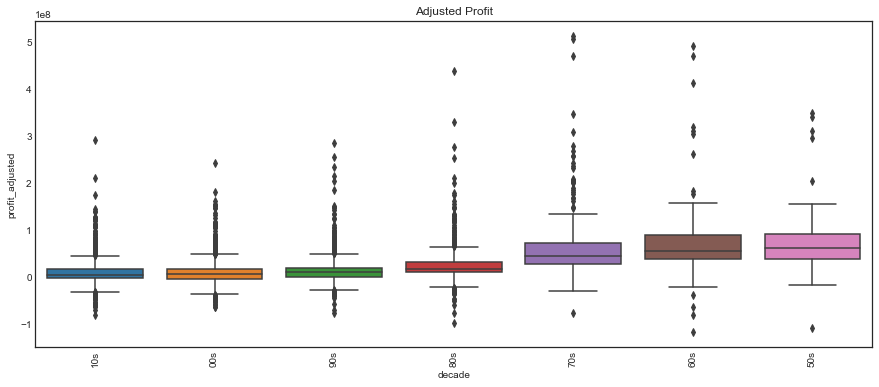

In [49]:
plt.style.use('seaborn-white')
fig = plt.figure(figsize=(15,6))


g = sns.boxplot(x=data_with_inflation['decade'], y=data_with_inflation['profit_adjusted'])
# g.set_yscale("log")

plt.title('Adjusted Profit')

plt.xticks(rotation=90)

plt.show()

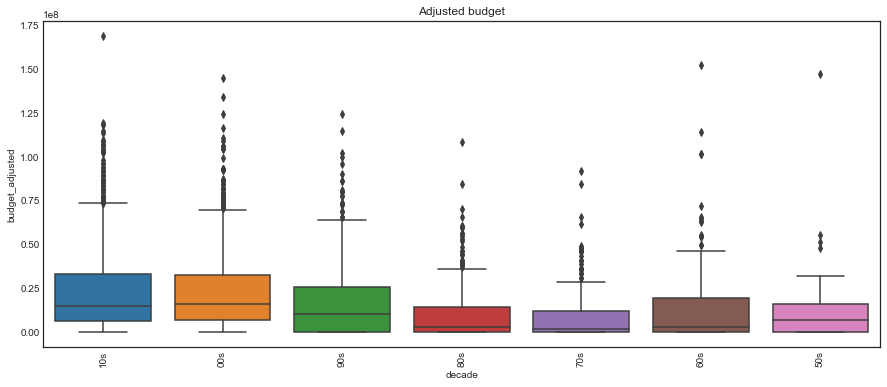

In [50]:
plt.style.use('seaborn-white')
fig = plt.figure(figsize=(15,6))


g = sns.boxplot(x=data_with_inflation['decade'], y=data_with_inflation['budget_adjusted'])
# g.set_yscale("log")

plt.title('Adjusted budget')

plt.xticks(rotation=90)

plt.show()

In [ ]:
# plt.style.use('seaborn-white')
# fig = plt.figure(figsize=(15,6))


# g = sns.boxplot(x=data_with_inflation['decade'], y=data_with_inflation['all_scores'])
# # g.set_yscale("log")

# plt.title('Adjusted budget')

# plt.xticks(rotation=90)

# plt.show()

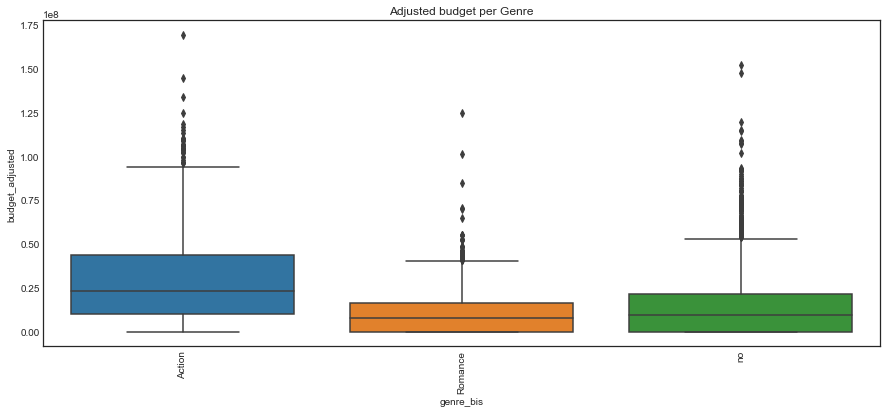

In [51]:
plt.style.use('seaborn-white')
fig = plt.figure(figsize=(15,6))


g = sns.boxplot(x=data_with_inflation['genre_bis'], y=data_with_inflation['budget_adjusted'])
# g.set_yscale("log")

plt.title('Adjusted budget per Genre')

plt.xticks(rotation=90)

plt.show()

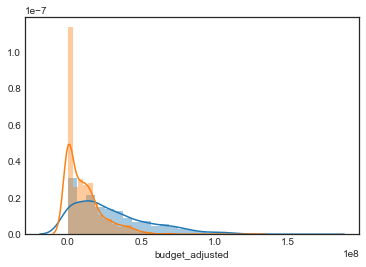

In [52]:
sns.distplot(data_with_inflation[data_with_inflation['genre_bis']=='Action'].budget_adjusted)

sns.distplot(data_with_inflation[data_with_inflation['genre_bis']=='Romance'].budget_adjusted)

In [ ]:
# data_with_inflation[data_with_inflation['genre_bis']=='Action'].budget_adjusted.value_counts()

# Hypothesis test to copy-paste

## Movies on 50's and 60's made more revenue than movies nowadays (00's and 10's)

In [71]:
data_with_inflation
data_for_ht = data_with_inflation.replace(0,data_with_inflation.median())

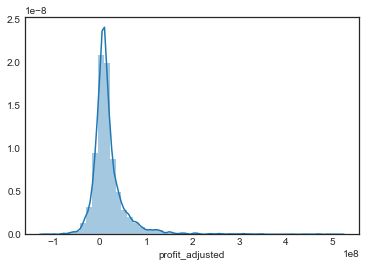

In [72]:
sns.distplot(data_for_ht.profit_adjusted)

In [93]:
fifth_movies_profit_adjusted = np.array(data_for_ht[(data_for_ht['decade'] == "50s")|(data_for_ht['decade'] == "60s")]['profit_adjusted'])
now_movies_profit_adjusted = np.array(data_for_ht[(data_for_ht['decade']== "00s")|(data_for_ht['decade'] == "10s")]['profit_adjusted'])

In [79]:
# romance_movies_profit_adjusted

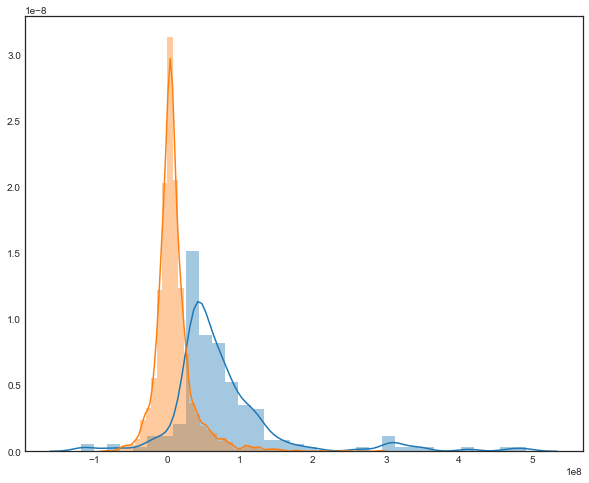

In [80]:
plt.figure(figsize=(10,8))

sns.distplot(fifth_movies_profit_adjusted)
sns.distplot(now_movies_profit_adjusted)


### Sampling samples

In [81]:
import random 

In [95]:
def samples_means(array, samples_wanted):
    sample_means = []
    for i in range(samples_wanted):
        sample_means.append(np.mean(random.sample(list(array), 35)))
    return sample_means

In [100]:
fiv_sample_means = samples_means(fifth_movies_profit_adjusted, 30)
now_sample_means = samples_means(now_movies_profit_adjusted, 30)

print(fiv_sample_means, now_sample_means)

[83267292.05455406, 52993045.194326915, 79225692.15354912, 69478911.66948044, 84131543.69618249, 75258686.81886673, 53313562.99921636, 76201193.97971997, 66394825.90139927, 96720818.8942533, 74868602.26218617, 97759977.01980671, 76034313.08115774, 87936978.57554209, 58469206.071762286, 76099200.67482428, 81266288.80626485, 109579491.42855796, 103745960.98805039, 85859668.40524527, 81008569.72815828, 60111094.99037885, 66015018.977894895, 86212718.06140521, 74148724.34042107, 66767594.55213162, 88051893.19556545, 68063704.9050997, 90203981.33724016, 69863889.760167] [5477969.41142022, 929849.5220083063, 658821.9685269635, 19827864.90110423, 14466195.270836962, 13657782.354890443, 11680860.659168258, 13429924.943113178, 5940407.504513244, 6676275.779582824, 11775601.25550282, 9733859.197535474, 10439085.652911872, 1495132.4180737648, 17457379.75853006, 4382610.9549860805, 18270466.490553897, 4574815.557124151, 8056414.234443539, 10714371.53450318, 12630092.350756356, 12415722.589918073, 

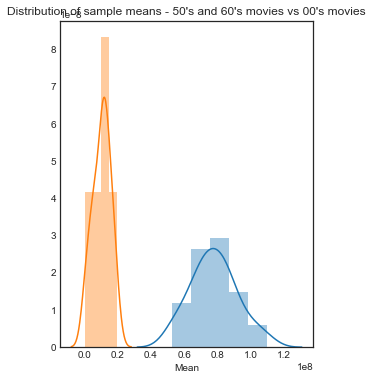

In [120]:
plt.figure(figsize=(10,6))
plt.subplot(1,2,1)
sns.distplot(fiv_sample_means, axlabel='Mean')

# plt.subplot(1,2,2)
sns.distplot(now_sample_means)

plt.title("Distribution of sample means - 50's and 60's movies vs 00's movies")
plt.show()



In [114]:
# sns.distplot(now_sample_means)

### Back to the two "populations"

In [123]:
print("The mean for 50s movies is :",fifth_movies_profit_adjusted.mean())
print("The std for 50s movies is :",fifth_movies_profit_adjusted.std())
print("The var for 50s movies is :",fifth_movies_profit_adjusted.var())

print('=====================')

print("The mean for now movies is :",now_movies_profit_adjusted.mean())
print("The std for now movies is :",now_movies_profit_adjusted.std())
print("The var for now movies is :",now_movies_profit_adjusted.var())



The mean for 50s movies is : 76559381.44716212
The std for 50s movies is : 82982193.1145535
The var for 50s movies is : 6886044374101050.0
The mean for now movies is : 9618632.796179065
The std for now movies is : 27623106.735850368
The var for now movies is : 763036025740182.0


### Welch t-test

In [127]:
def welch_t(a, b):
    
    """ Calculate Welch's t-statistic for two samples. """

    numerator = a.mean() - b.mean()
    
    # “ddof = Delta Degrees of Freedom”: the divisor used in the calculation is N - ddof, 
    #  where N represents the number of elements. By default ddof is zero.
    
    denominator = np.sqrt(a.var(ddof=1)/a.size + b.var(ddof=1)/b.size)
    
    return np.abs(numerator/denominator)

print('Wlech T-test is: {}'.format(welch_t(fifth_movies_profit_adjusted, now_movies_profit_adjusted)))

Wlech T-test is: 11.071194499940479


### Degrees of freedom

In [128]:
def welch_df(a, b):
    
    """ Calculate the effective degrees of freedom for two samples. """
    
    s1 = a.var(ddof=1) 
    s2 = b.var(ddof=1)
    n1 = a.size
    n2 = b.size
    
    numerator = (s1/n1 + s2/n2)**2
    denominator = (s1/ n1)**2/(n1 - 1) + (s2/ n2)**2/(n2 - 1)
    
    return numerator/denominator

print('Wlech degrees of freedom are: {}'.format(welch_df(fifth_movies_profit_adjusted, now_movies_profit_adjusted)))

Wlech degrees of freedom are: 193.3316231895007


In [131]:
t = welch_t(fifth_movies_profit_adjusted, now_movies_profit_adjusted)
df = welch_df(fifth_movies_profit_adjusted, now_movies_profit_adjusted)

### Convert to p-value

In [129]:
import scipy.stats as stats

In [133]:
p = 1 - float(stats.t.cdf(t, df))
print(p)

0.0


# Movies nowadays have higher budget than movies on 50's and 60's

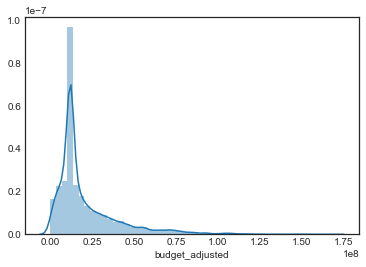

In [135]:
sns.distplot(data_for_ht.budget_adjusted)

In [136]:
fifth_movies_budget_adjusted = np.array(data_for_ht[(data_for_ht['decade'] == "50s")|(data_for_ht['decade'] == "60s")]['budget_adjusted'])
now_movies_budget_adjusted = np.array(data_for_ht[(data_for_ht['decade']== "00s")|(data_for_ht['decade'] == "10s")]['budget_adjusted'])

In [79]:
# romance_movies_profit_adjusted

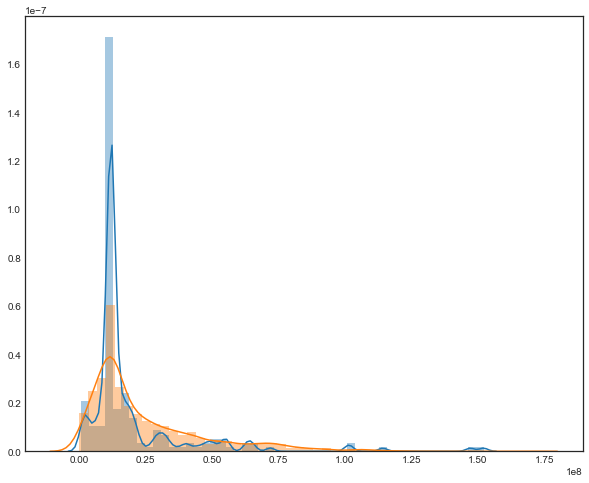

In [137]:
plt.figure(figsize=(10,8))

sns.distplot(fifth_movies_budget_adjusted)
sns.distplot(now_movies_budget_adjusted)


### Sampling samples

In [138]:
import random 

In [139]:
def samples_means(array, samples_wanted):
    sample_means = []
    for i in range(samples_wanted):
        sample_means.append(np.mean(random.sample(list(array), 35)))
    return sample_means

In [140]:
fiv_sample_means = samples_means(fifth_movies_budget_adjusted, 30)
now_sample_means = samples_means(now_movies_budget_adjusted, 30)

print(fiv_sample_means, now_sample_means)

[15563712.078655342, 23705451.578523375, 13804403.999428477, 19914732.725604787, 16510810.449286962, 17337791.552608766, 21377608.025354855, 21489377.090056166, 21645768.43735684, 16823703.25999428, 22742371.076568425, 26637811.391917057, 24871878.05320133, 20450829.351512186, 15706436.647317816, 27651914.077127036, 22989284.957364313, 12693796.128343994, 18413745.675875153, 19568806.96093204, 18272793.988862507, 18965824.537820846, 23691134.65356184, 16746408.79108574, 18343552.177304555, 19668020.02379111, 20968612.71318394, 22459468.187669758, 23806913.67278293, 27533368.514050763] [20807795.186998807, 30133551.75612117, 26094215.931774516, 31894442.28239819, 26923953.134150326, 20003556.547882993, 24641853.925075985, 31841733.61372139, 21496384.319722038, 20941448.21714195, 24061450.874170367, 27810102.85292392, 21957812.013579864, 19260001.049754992, 29407750.549117718, 20378980.914415807, 23964318.425228115, 27537550.840773407, 25559590.71345003, 27156534.49473546, 26139100.29793

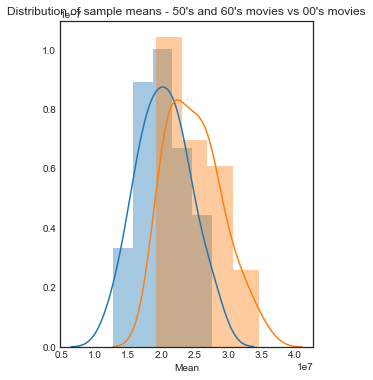

In [141]:
plt.figure(figsize=(10,6))
plt.subplot(1,2,1)
sns.distplot(fiv_sample_means, axlabel='Mean')

# plt.subplot(1,2,2)
sns.distplot(now_sample_means)

plt.title("Distribution of sample means - 50's and 60's movies vs 00's movies")
plt.show()



In [114]:
# sns.distplot(now_sample_means)

### Back to the two "populations"

In [142]:
print("The mean for 50s movies is :",fifth_movies_budget_adjusted.mean())
print("The std for 50s movies is :",fifth_movies_budget_adjusted.std())
print("The var for 50s movies is :",fifth_movies_budget_adjusted.var())

print('=====================')

print("The mean for now movies is :",now_movies_budget_adjusted.mean())
print("The std for now movies is :",now_movies_budget_adjusted.std())
print("The var for now movies is :",now_movies_budget_adjusted.var())



The mean for 50s movies is : 19764124.990171283
The std for 50s movies is : 21891245.965123907
The var for 50s movies is : 479226649905553.75
The mean for now movies is : 24423378.743268598
The std for now movies is : 22223271.86481622
The var for now movies is : 493873812377532.06


### Welch t-test

In [143]:
def welch_t(a, b):
    
    """ Calculate Welch's t-statistic for two samples. """

    numerator = a.mean() - b.mean()
    
    # “ddof = Delta Degrees of Freedom”: the divisor used in the calculation is N - ddof, 
    #  where N represents the number of elements. By default ddof is zero.
    
    denominator = np.sqrt(a.var(ddof=1)/a.size + b.var(ddof=1)/b.size)
    
    return np.abs(numerator/denominator)

print('Wlech T-test is: {}'.format(welch_t(fifth_movies_budget_adjusted, now_movies_budget_adjusted)))

Wlech T-test is: 2.821414107427349


### Degrees of freedom

In [145]:
def welch_df(a, b):
    
    """ Calculate the effective degrees of freedom for two samples. """
    
    s1 = a.var(ddof=1) 
    s2 = b.var(ddof=1)
    n1 = a.size
    n2 = b.size
    
    numerator = (s1/n1 + s2/n2)**2
    denominator = (s1/ n1)**2/(n1 - 1) + (s2/ n2)**2/(n2 - 1)
    
    return numerator/denominator

print('Wlech degrees of freedom are: {}'.format(welch_df(fifth_movies_budget_adjusted, now_movies_budget_adjusted)))

Wlech degrees of freedom are: 221.99915543691014


In [147]:
t2 = welch_t(fifth_movies_budget_adjusted, now_movies_budget_adjusted)
df2 = welch_df(fifth_movies_budget_adjusted, now_movies_budget_adjusted)

### Convert to p-value

In [129]:
import scipy.stats as stats

In [148]:
p = 1 - float(stats.t.cdf(t2, df2))
print(p)

0.0026073484046530426
